<a href="https://colab.research.google.com/github/prince808321/Head-Count/blob/main/HEAD_COUNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEAD COUNT

In [ ]:
# Install necessary libraries
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install opencv-python-headless  # Use headless version for Colab
!pip install pandas

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
import torch

# Load the YOLOv5 large model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-16 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 128MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import cv2

def count_people(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Inference using YOLOv5
    results = model(img)

    # Convert results to pandas DataFrame
    df = results.pandas().xyxy[0]

    # Filter for only 'person' detections
    person_df = df[df['name'] == 'person']
    person_count = len(person_df)

    # Optional: Display results, but only show persons
    if person_count > 0:
        results.show()  # This shows the image with detected bounding boxes
    else:
        print("No persons detected.")

    # Print the number of persons detected
    print(f"Number of persons detected: {person_count}")

    # Return the number of people detected
    return person_count

Saving seq_001440.jpg to seq_001440.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


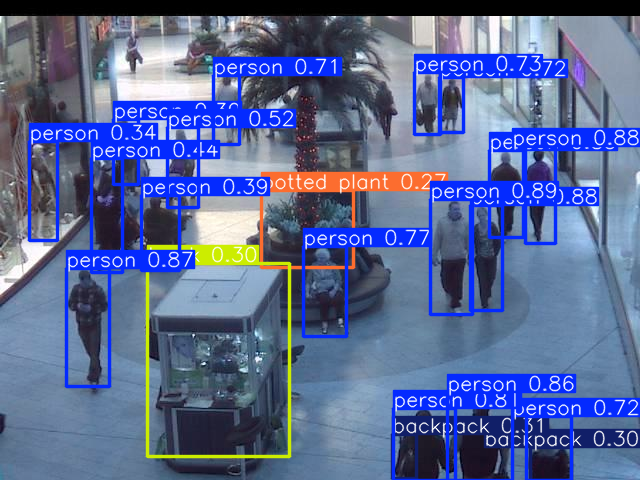

Number of persons detected: 17


In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the uploaded image filename
image_path = list(uploaded.keys())[0]  # Get the first uploaded file

# Count people in the image
people_count = count_people(image_path)